In [31]:
%pip install langchain python-ollama requests matplotlib flask --quiet

Note: you may need to restart the kernel to use updated packages.


In [32]:
import random


def get_mock_financial_data():
    """Simulates a financial API response."""
    return {
        "index": "NASDAQ",
        "volume": random.randint(500000, 2000000),
        "avg_volume": 1000000,
        "price_change": round(random.uniform(-3, 3), 2),
    }


def get_mock_kubernetes_metrics():
    """Simulates a Kubernetes metrics API response."""
    return {
        "service": "trading-platform",
        "cpu_usage": random.randint(50, 90),
        "memory_usage": random.randint(50, 90),
    }

In [33]:
from langchain.tools import tool


@tool
def get_financial_data():
    """Fetches mock financial trading data."""
    return get_mock_financial_data()


@tool
def get_kubernetes_metrics():
    """Fetches mock Kubernetes metrics."""
    return get_mock_kubernetes_metrics()


@tool
def scale_service(action: str):
    """Simulates scaling a Kubernetes service."""
    return f"Scaling action: {action} executed successfully."

In [34]:
from langchain.agents.initialize import initialize_agent
from langchain.agents import Tool, AgentType
from langchain.llms import Ollama

# Initialize Ollama LLM
llm = Ollama(model="deepseek-r1")

# Define tools
tools = [
    Tool(
        name="Get Financial Data",
        func=get_financial_data,
        description="Fetches financial trading data.",
    ),
    Tool(
        name="Get Kubernetes Metrics",
        func=get_kubernetes_metrics,
        description="Fetches system metrics.",
    ),
    Tool(
        name="Scale Service",
        func=scale_service,
        description="Scales Kubernetes services to handle load.",
    ),
]

# Define ReAct agent
agent = initialize_agent(
    tools=tools,
    llm=llm,
    agent=AgentType.ZERO_SHOT_REACT_DESCRIPTION,
    verbose=True,
    handle_parsing_errors=True,
)

In [35]:
prompt = """
You are an AI agent monitoring the stock market and Kubernetes clusters.
Your task is to:
1. Fetch financial data to check for surges in stock trading activity.
2. Fetch Kubernetes metrics to assess the system's current state.
3. If a surge is detected (volume > 1.5x avg_volume or price_change > 2%), take a scaling action to prepare the system for increased load.
4. Log your reasoning and actions.

Start by reasoning through the problem step-by-step. Use tools to gather data and act as needed.

Question: Should we scale the Kubernetes system based on current conditions?
"""

In [36]:
response = agent.run(prompt)
print(response)



> Entering new AgentExecutor chain...


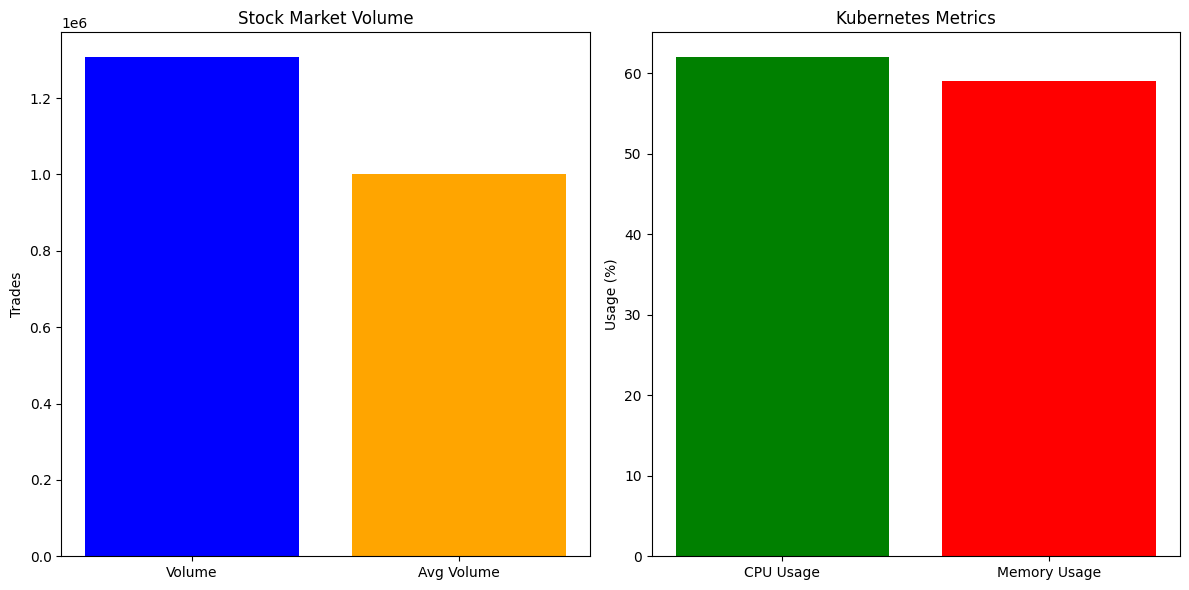

In [ ]:
import matplotlib.pyplot as plt

# Get mock data
financial_data = get_mock_financial_data()
metrics_data = get_mock_kubernetes_metrics()

# Plot data
plt.figure(figsize=(12, 6))

# Financial Data
plt.subplot(1, 2, 1)
plt.bar(
    ["Volume", "Avg Volume"],
    [financial_data["volume"], financial_data["avg_volume"]],
    color=["blue", "orange"],
)
plt.title("Stock Market Volume")
plt.ylabel("Trades")

# IT Metrics
plt.subplot(1, 2, 2)
plt.bar(
    ["CPU Usage", "Memory Usage"],
    [metrics_data["cpu_usage"], metrics_data["memory_usage"]],
    color=["green", "red"],
)
plt.title("Kubernetes Metrics")
plt.ylabel("Usage (%)")

plt.tight_layout()
plt.show()

In [ ]:
import json

log = {
    "financial_data": financial_data,
    "metrics_data": metrics_data,
    "action": response,
}

with open("agent_log.json", "w") as file:
    json.dump(log, file, indent=4)